In [10]:
import matplotlib


In [9]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import wordcloud
from datetime import datetime, date
import time
from datetime import date

import imageio

from matplotlib.patches import Patch
from wordcloud import wordcloud, STOPWORDS, ImageColorGenerator


In [11]:
df_Patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
df_EDvisits = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
df_AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
df_ReadmissionRegistry = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
df_Discharges = pd.read_excel("HospitalDatabase.xlsx","Discharges")
df_Providers = pd.read_excel("HospitalDatabase.xlsx","Providers")
df_EDunique = pd.read_excel("HospitalDatabase.xlsx","EDUnique")


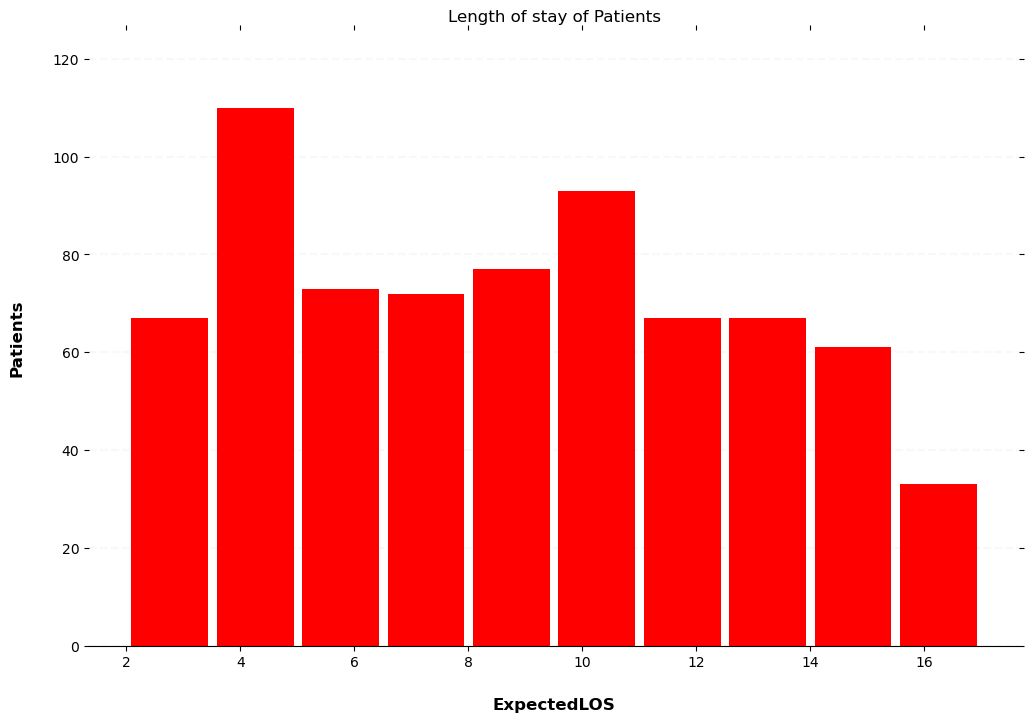

In [20]:
# 41. Plot a graph to show the distribution of expected length of stay.

Elos1 = df_ReadmissionRegistry.hist(column='ExpectedLOS', bins=10, grid=False, figsize=(12,8), color ='red', zorder=2, rwidth=0.9)
Elos1 = Elos1[0]
for x in Elos1 :
    
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # title 
    x.set_title("Length of stay of Patients")

    # Set x-axis label
    x.set_xlabel("ExpectedLOS", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Patients", labelpad=20, weight='bold', size=12)
   
# df_Discharges.hist(column='ExpectedLOS')

plt.show()


In [8]:
# 42. Delete the column 'DischargeDispostion' iteratively.

sheets = [df_Patients, df_EDvisits, df_AmbulatoryVisits, df_ReadmissionRegistry, df_Discharges, df_Providers, df_EDunique]
#col = 'DischargeDispostion'
for df in sheets:
    for col in df.columns:
        if 'DischargeDisposition' in col:
            #df.drop('DischargeDisposition', axis=1, inplace=True)
            del df['DischargeDisposition']
print(sheets, "\n")



[     PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language  
0                     White  English  
1                     White  English  
2                     White  English  
3             

In [22]:
# 43. Find the age prone to get stroke.

#Age
import pandas as pd
from datetime import datetime, date
import time
from datetime import date
df_Patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
df_Patients['DateOfBirth'] = pd.to_datetime(df_Patients['DateOfBirth'])
current_date = datetime.today()
df_Patients['Age'] = (current_date - df_Patients['DateOfBirth']).dt.days // 365
df_Patients = df_Patients.drop(columns=['FirstName', 'LastName','DateOfBirth','Gender','Race','Language'])
df_PatientsNew = pd.merge(df_Patients,df_Discharges,on=["PatientID"])
df_Stroke = df_PatientsNew[df_PatientsNew['PrimaryDiagnosis'] == 'Stroke']                              
df_Age = (df_Stroke.groupby(df_Patients['Age']).count()).sort_values('PrimaryDiagnosis', ascending=False)                               
print("The Age", df_Age.index[0] , "is  prone to strokes.")

The Age 38 is  prone to strokes.


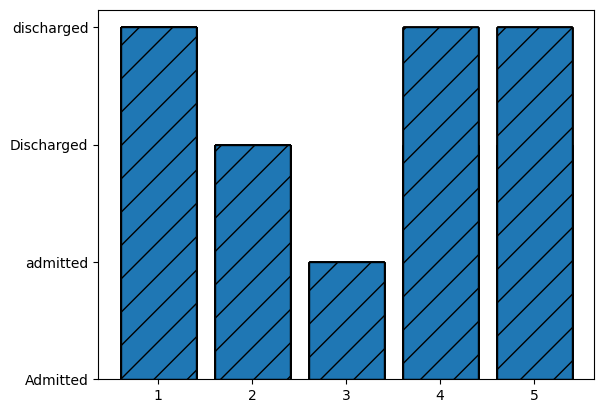

In [114]:
# 44. Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.
# u_acuity = np.unique(df_EDunique['Acuity'])
# u_ED = np.unique(df_EDunique['EDDisposition'])

plt.bar(x = df_EDunique['Acuity'], height = df_EDunique['EDDisposition'], edgecolor='black', hatch='/')
plt.show()

#print(df_EDunique[['Acuity', 'EDDisposition']]).unique()

In [17]:
# 45. Usage of Enumeration in Python with any example.
# with enumeration we can get  indices  of the values next to eachother and easy to pull data or values form there. 
#example
df_EDunique = pd.read_excel("HospitalDatabase.xlsx","EDUnique")
#ReasonForVisit
test = df_EDunique['ReasonForVisit']
for i,j in enumerate(test):
    if i < 5 :
        i = i+1
        print(i, j)
    

1 Stomach Ache
2 Migraine
3 Stomach Ache
4 Migraine
5 Chest Pain


C:\Users\Rajanikanth\AppData\Local\Temp\ipykernel_11588\608498589.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_EDvisits.corr(), vmin=-1, vmax=1, annot=True)


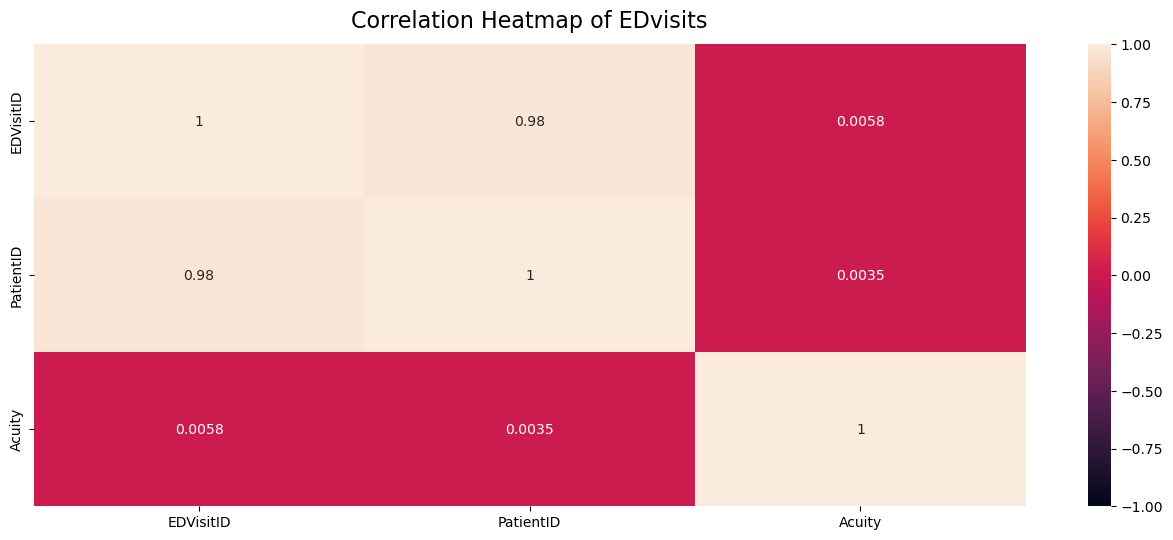

In [9]:
# 46. Create a heat map to show the correlation between the column values of Edvisits.
#sns.heatmap(df_EDvisits.corr());
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_EDvisits.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap of EDvisits', fontdict={'fontsize':16}, pad=12);
plt.show()

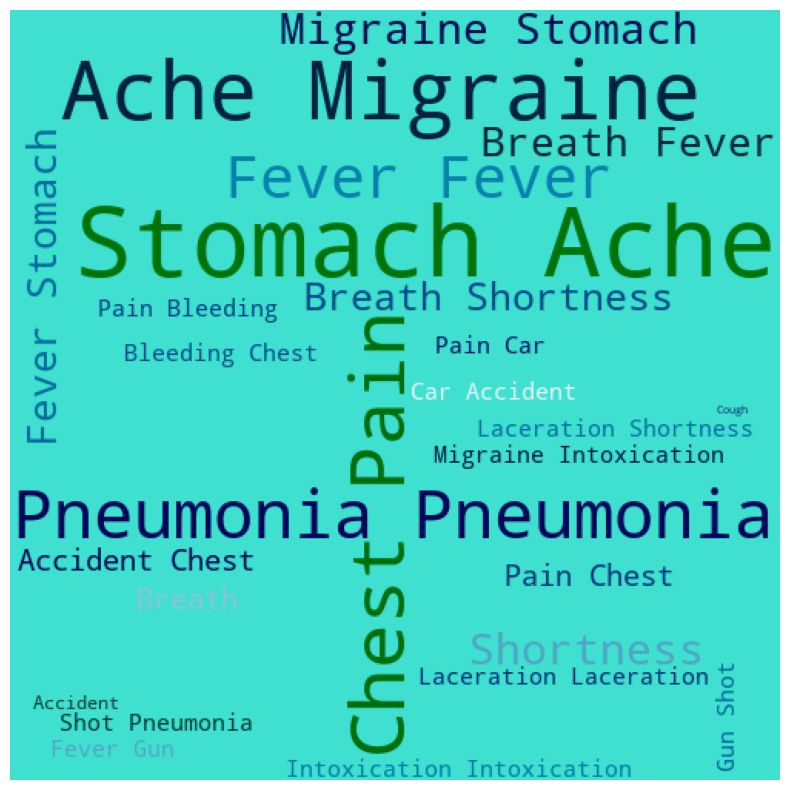

In [7]:
# 47. Create a WordCloud Chart with Reason For Visit.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df_EDvisits = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off");
text = df_EDvisits['ReasonForVisit'].tolist()
text_join = ' '.join(text)
wordcloud = WordCloud(width = 500, height = 500, background_color='#40E0D0', colormap="ocean",  random_state=10).generate(text_join)
plot_cloud(wordcloud)

In [ ]:
# 48. List male patients over the age of 60 who have undergone surgery from January-March 2019.

In [67]:
# 49. Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.
df_EDvisits = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
df_EDvisits = df_EDvisits.drop(columns=['EDVisitID','VisitDate','EDDischargeTime','ReasonForVisit'])
data = {"Acuity":df_EDvisits['Acuity'], "Rfv":df_EDvisits['EDDisposition']}
df_Acuity_Rfv= pd.DataFrame(data)
df_with_indices = df_EDvisits.set_index(['Acuity', 'EDDisposition'])
df_NoPatients = df_with_indices.groupby(df_EDvisits['EDDisposition','Acuity']).count()
#df_Age = (df_Stroke.groupby(df_Patients['Age']).count())
print(df_NoPatients)


KeyError: ('EDDisposition', 'Acuity')

In [9]:
# 50. Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.
df_Patients.loc[101:200,['FirstName','LastName']]

FirstName    LastName
101     Gipsy    Frankton
102    Jethro      Wharin
103       Viv     Aylward
104     Swift   Dreschler
105     Fadel  Jacquemard
..        ...         ...
196      Noam    Laguerre
197      Arie     Bayless
198    Janaye     O'Mohun
199      Fonz       Group
200  Cummings      Pickup

[100 rows x 2 columns]

In [7]:
# 53. Add column 'Age' in Patient table.
import pandas as pd
from datetime import datetime, date
import time
from datetime import date
df_Patients = pd.read_excel("HospitalDatabase.xlsx","Patients")

# Convert the 'BirthDate' column to datetime
df_Patients['DateOfBirth'] = pd.to_datetime(df_Patients['DateOfBirth'])

# Calculate the current date
current_date = datetime.today()

# Calculate age based on the difference between the current date and birth date
df_Patients['Age'] = (current_date - df_Patients['DateOfBirth']).dt.days // 365

# Display the DataFrame with the new 'Age' column
print(df_Patients)


     PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language  Age  
0                     White  English   63  
1                     White  English   37  
2                     White  English   